In [1]:
import os
import csv
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure

## Helper functions to load and process original csv files

In [2]:
# this function load one .cvs (a sequence)
def load_data(dataset, csv_folder='./NAB-known-anomaly/csv-files/'):
	if dataset == 'wind_power':
		data_file = os.path.join(csv_folder, 'wind_power_mini.csv')
		anomalies = ['2013-12-22 20:00:00', '2014-04-13 09:00:00']
		t_unit = '10 min'

	t = []
	readings = [] 
	idx_anomaly = []
	i = 0
	with open(data_file) as csvfile:
		readCSV = csv.reader(csvfile, delimiter=',')
		print("\n--> Anomalies occur at:")
		for row in readCSV:
			if i > 0:
				t.append(i)
				#print(row[1:10])
				readings.append([float(x) if x!="" else 0 for x in row[1:11]])
				if int(row[11]) == 0:
					idx_anomaly.append(i)
					#print("  timestamp #{}: {}".format(j, row[0]))
			i = i + 1
	t = np.asarray(t)
	readings = np.asarray(readings)
	print("\nOriginal csv file contains {} timestamps.".format(t.shape))
	print("Processed time series contain {} readings.".format(readings.shape))
	print("Anomaly indices are {}".format(idx_anomaly))
	
	return t, t_unit, readings, idx_anomaly

In [ ]:
# This function plots a dataset with the train/test split and known anomalies
# Relies on helper function load_data()

def process_and_save_specified_dataset(dataset, idx_split, y_scale=5, save_file=False):
	t, t_unit, readings, idx_anomaly = load_data(dataset)
	
	# split into training and test sets
	training = readings[idx_split[0]:idx_split[1]]
	t_train = t[idx_split[0]:idx_split[1]]
	
	# normalise by training mean and std 
	train_m = np.mean(training,axis=0)
	train_std = np.std(training,axis=0)
	print("\nTraining set mean is {}".format(train_m))
	print("Training set std is {}".format(train_std))
	readings_normalised = (readings - train_m) / train_std
	
	training = readings_normalised[idx_split[0]:idx_split[1]]
	if idx_split[0] == 0:
		test = readings_normalised[idx_split[1]:]
		t_test = t[idx_split[1]:] - idx_split[1]
		idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]
	else:
		test = [readings_normalised[:idx_split[0]], readings_normalised[idx_split[1]:]]
		t_test = [t[:idx_split[0]], t[idx_split[1]:] - idx_split[1]]
		idx_anomaly_split = np.squeeze(np.argwhere(np.asarray(idx_anomaly)>idx_split[0]))
		idx_anomaly_test = [np.asarray(idx_anomaly[:idx_anomaly_split[0]]), 
							np.asarray(idx_anomaly[idx_anomaly_split[0]:]) - idx_split[1]]
	print("Anomaly indices in the test set are {}".format(idx_anomaly_test))
	
	if save_file:
		save_dir = '../datasets/NAB-known-anomaly/'
		np.savez(save_dir+dataset+'.npz', t=t, t_unit=t_unit, readings=readings, idx_anomaly=idx_anomaly,
					idx_split=idx_split, training=training, test=test, train_m=train_m, train_std=train_std,
					t_train=t_train, t_test=t_test, idx_anomaly_test=idx_anomaly_test)
		print("\nProcessed time series are saved at {}".format(save_dir+dataset+'.npz'))
	else:
		print("\nProcessed time series are not saved.")
	
	# plot the whole normalised sequence
	fig, axs = plt.subplots(1, 1, figsize=(18, 4), edgecolor='k')
	fig.subplots_adjust(hspace=.4, wspace=.4)
	# axs = axs.ravel()
	# for i in range(4):
	axs.plot(t, readings_normalised)
	if idx_split[0] == 0:
		axs.plot(idx_split[1]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'b--')
	else:
		for i in range(2):
			axs.plot(idx_split[i]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'b--')
	for j in range(len(idx_anomaly)):
		axs.plot(idx_anomaly[j]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'r--')
	#     axs.plot(data[:,1])
	axs.grid(True)
	axs.set_xlim(0, len(t))
	axs.set_ylim(-y_scale, y_scale)
	axs.set_xlabel("timestamp (every {})".format(t_unit))
	axs.set_ylabel("normalised readings")
	axs.set_title("{} dataset\n(normalised by train mean {} and std {})".format(dataset, train_m, train_std))
	axs.legend(('data', 'train test set split', 'anomalies'))
	
	return t, readings_normalised

## Example on ambient temperature series


--> Anomalies occur at:

Original csv file contains (11999,) timestamps.
Processed time series contain (11999, 10) readings.
Anomaly indices are [7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799, 7800, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7811, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7821, 7822, 7823, 7824, 7825, 7826, 7827, 7828, 7829, 7830, 7831, 7832, 7833, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843, 7844, 7845, 7846, 7847, 7848, 7849, 7850, 7851, 7852, 7853, 7854, 7855, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7867, 7868, 7869, 7870, 7871, 7872, 7873, 7874, 7875, 7876, 7877, 7878, 7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7893, 7894, 7895, 7896, 7

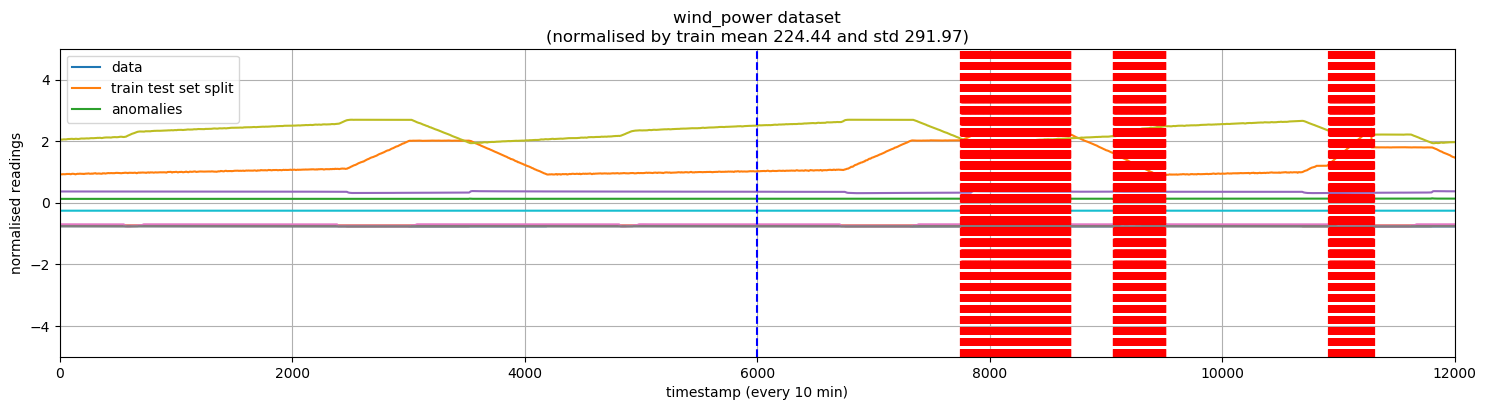

In [4]:
dataset = 'wind_power'
idx_split = [0,6000]

t, readings_normalised = process_and_save_specified_dataset(dataset, idx_split,save_file=True)